In [18]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
workingDirectory = '/home/h1bennet/strains_rna/results/L01_Strains_AMLN30weeks_LSEC_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/AMLN_30week_lsec/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [20]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/AMLN_30week_lsec//
./AMLN_30week_lsec_qc/


<Figure size 432x288 with 0 Axes>

In [21]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
NCoRWT_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_LN144B_JSS_l20170916_GATCAG,7668460.0,75.0,0.004833,1.715,0.48,14347153.0,13152139.0,914684.0,0.0,0.0079,0.0042,0.916707,0.9879
NCoRWT_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_LN155A_JSS_l20170916_TACAGC,6889131.0,75.0,0.005198,2.054,0.47,15372805.0,14148141.0,922889.0,0.0,0.0089,0.0044,0.920336,0.9867
aj_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_AJ6A_JSS_l20170916_TCCCGA,7454501.0,75.0,0.005969,2.179,-1.00,17582328.0,16243424.0,993571.0,0.0,0.0099,0.0046,0.923849,0.9855
aj_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_AJ6D_JSS_l20170916_GTCCGC,6543197.0,75.0,0.005472,2.276,-1.00,16045403.0,14893831.0,878893.0,0.0,0.0084,0.0039,0.928230,0.9877
balbc_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_BALB6A_JSS_l20170916_CAACTA,5819852.0,75.0,0.005672,2.653,-1.00,16610404.0,15437423.0,789404.0,0.0,0.0107,0.0044,0.929383,0.9849
balbc_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_BALB6B_JSS_l20170916_CACCGG,6394090.0,75.0,0.006157,2.620,-1.00,18435897.0,16755059.0,993687.0,0.0,0.0226,0.0048,0.908828,0.9726
balbc_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_Balb3a_JSS_l160928,8858428.0,75.0,0.007093,2.179,-1.00,21511335.0,19299306.0,1835295.0,0.0,0.0041,0.0052,0.897169,0.9907
balbc_M_LSEC_RNA_polyA_AMLNDiet30weeks_JSSTDT_Balb3d_JSS_l160928,9780858.0,75.0,0.009892,2.753,-1.00,30005809.0,26922569.0,2519247.0,0.0,0.0046,0.0046,0.897245,0.9908


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [22]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/NCoRWT*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/*BALB6*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/aj*')))

In [23]:
c57_ids = [i.split('/')[-1].split('_')[7] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[7] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[7] for i in aj_paths]

In [24]:
ids = ['c57_lsec_amlndiet_30weeks',
       'balbc_lsec_amlndiet_30weeks',
       'aj_lsec_amlndiet_30weeks']
colors = ['#006d2c',
          '#08519c',
          '#a50f15']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [25]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

## Write differential genes to list for metascape

In [32]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [33]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05

In [34]:
gene_list_dict ={}

In [45]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_lsec_amlndiet_30weeks.vs.balbc_lsec_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (9028, 14)
ge selected transcripts (9028, 13)
./differential/aj_lsec_amlndiet_30weeks.vs.c57_lsec_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (9181, 14)
ge selected transcripts (9181, 13)
./differential/balbc_lsec_amlndiet_30weeks.vs.aj_lsec_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (9028, 14)
ge selected transcripts (9028, 13)
./differential/balbc_lsec_amlndiet_30weeks.vs.c57_lsec_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (9096, 14)
ge selected transcripts (9096, 13)
./differential/c57_lsec_amlndiet_30weeks.vs.aj_lsec_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (9181, 14)
ge selected transcripts (9181, 13)
./differential/c57

In [46]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_lsec_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()


aj_union
410 genes
aj_intersection
61 genes
balb_union
200 genes
balb_intersection
44 genes
c57_union
393 genes
c57_intersection
47 genes


# Plot potential nichenet ligands

In [51]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [52]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

### Intersection gene set

In [53]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

In [54]:
act_ligands

{'Adm',
 'Alox5ap',
 'Hbegf',
 'Itgal',
 'Itgb7',
 'Ptprc',
 'Selplg',
 'Serping1',
 'Slit2',
 'Vegfc'}

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


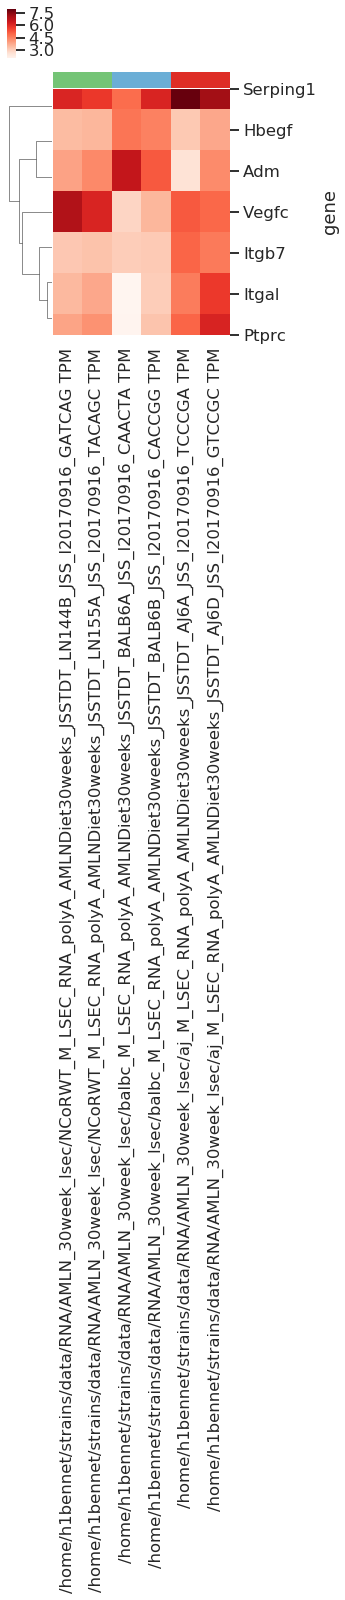

In [57]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1).dropna(),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


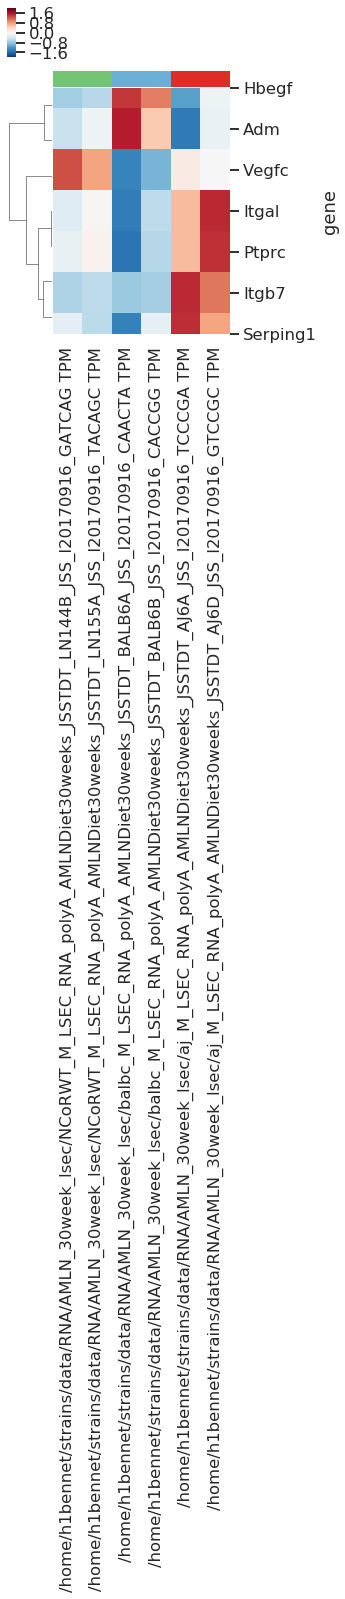

In [59]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1).dropna(),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

# Look at union gene set

In [61]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


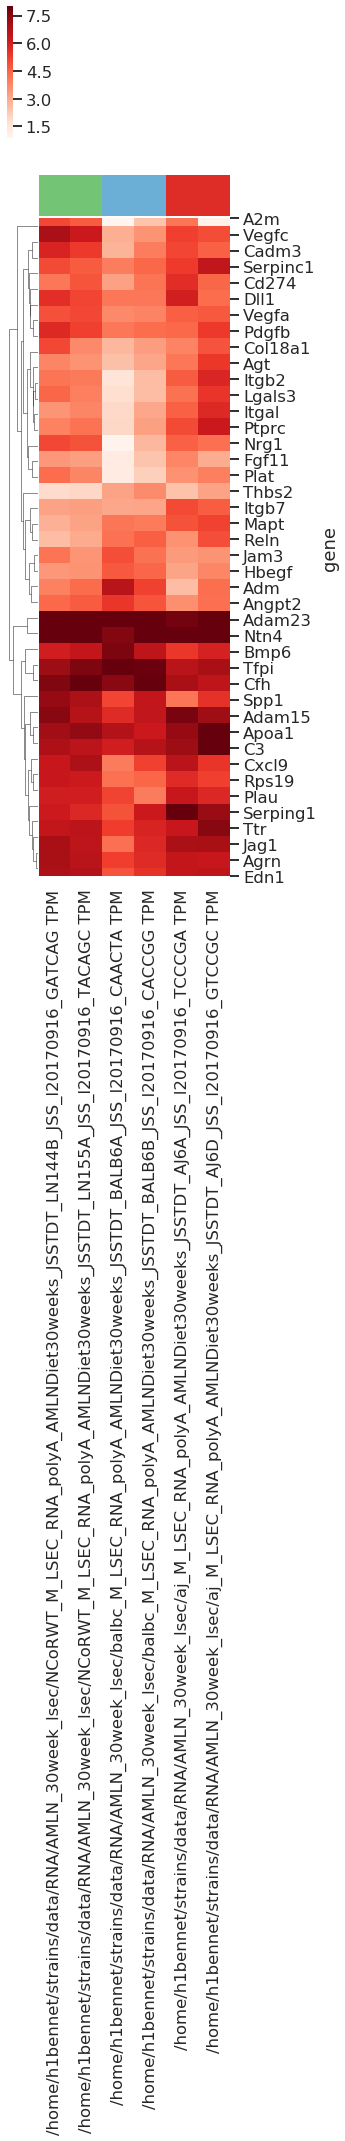

In [63]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1).dropna(),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,16),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


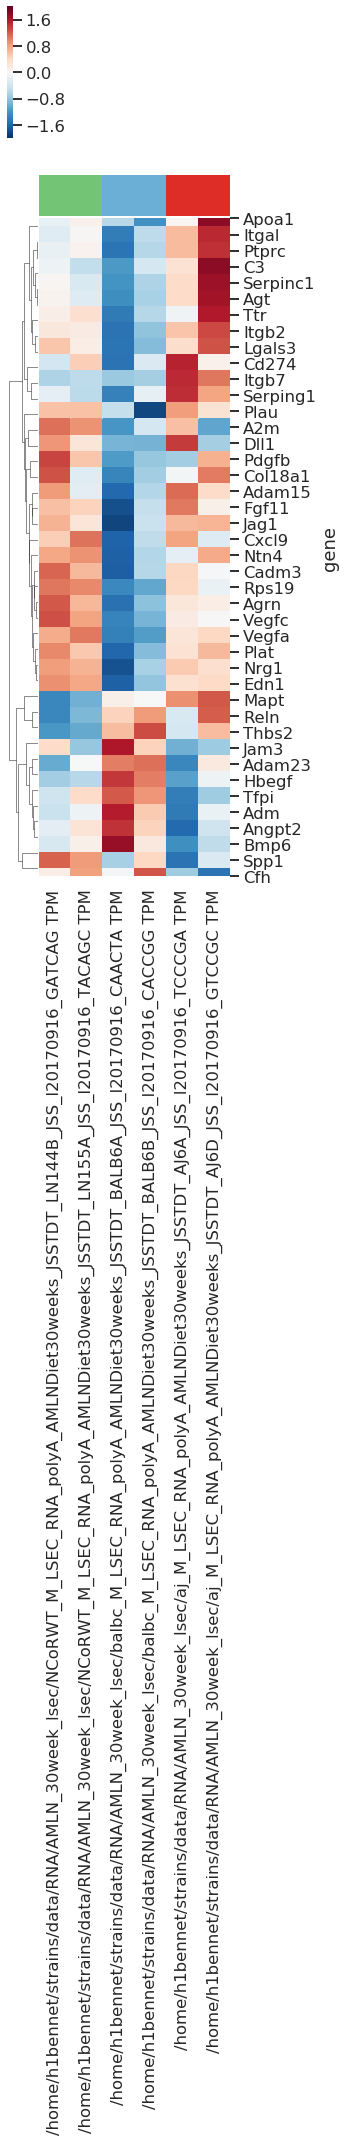

In [64]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1).dropna(),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,16),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()